<a href="https://colab.research.google.com/github/OSolerHugo/Data_science_Study/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


#from google.colab import drive
#drive.mount('drive')

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'

data = pd.read_csv(url)

data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


It is important to note that a portion of the data includes categorical features in the form of text. In order to utilize this data effectively, it is necessary to convert these categorical features into numerical representations.

In [3]:
convert_dic = {'Sim': 0, 
                'Nao': 1}
numerical_data = data[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(convert_dic)
numerical_data.head()

numerical_data = pd.concat([numerical_data, pd.get_dummies(data.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                axis=1))], axis=1)

numerical_data.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,1,0,1,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,1,1,0,1,1,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,1,1,0,0,0,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,1,1,1,1,1,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,1,1,0,0,0,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


The target variable in this particular case is categorical. To ensure an unbiased model, it is important for the categories within the target variable to be proportionate or balanced.

Firstly, we will create a plot to visualize the distribution of the target variable:

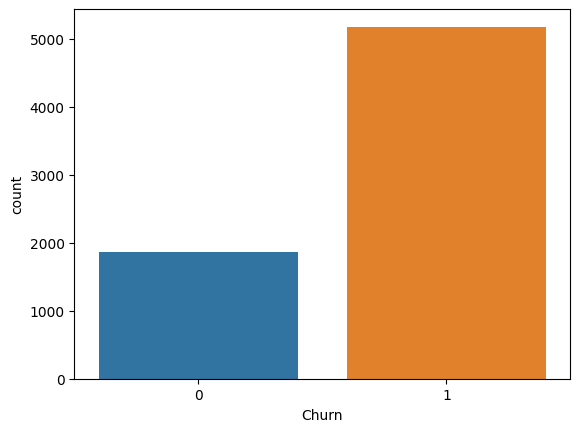

In [4]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data= numerical_data)

The proportion of instances with "Churn = 0" is larger than those with "Churn = 1". In order to balance the data and make it more proportional, we will utilize the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to oversample the data

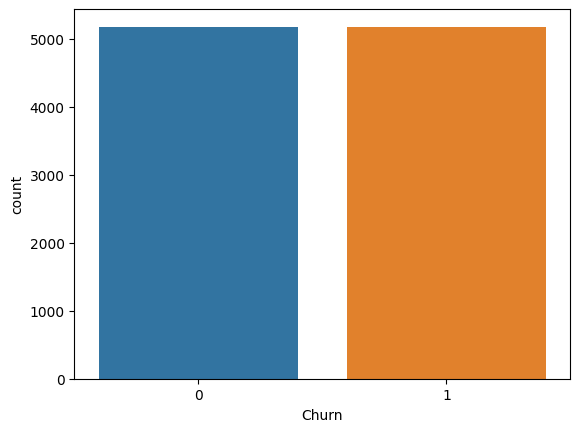

In [5]:
from imblearn.over_sampling import SMOTE

X = numerical_data.drop('Churn', axis = 1)
y = numerical_data['Churn']


smt = SMOTE(random_state=123)  
X, y = smt.fit_resample(X, y)  

final_data = pd.concat([X, y], axis=1)

ax = sns.countplot(x='Churn', data= final_data)

Now, we will proceed with data rescaling.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x = final_data.drop('Churn', axis = 1)

y = final_data['Churn']

norm = StandardScaler()

X_norm = norm.fit_transform(x)


We will split the data into training and test sets and proceed to implement the K Nearest Neighbors (KNN) classifier.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X_norm,y, 
                                                        test_size=0.3, random_state=123 )


knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, y_train)

predict_knn = knn.predict(X_test)

Now we use the Naive Bayes classifier for multivariate Bernoulli models.

In [8]:
from sklearn.naive_bayes import BernoulliNB


bnb = BernoulliNB(binarize= 0.0)
bnb.fit(X_train, y_train)
predict_BNb = bnb.predict(X_test)

Lastly, we will apply the Decision Tree Classifier to the data.

In [9]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_train, y_train)
predict_decisiontree = dtc.predict(X_test)

It is time to see the confusion matrix

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [38]:
cm_knn = confusion_matrix(y_test, predict_knn)
ac_knn = accuracy_score(y_test, predict_knn)
cm_bnb = confusion_matrix(y_test, predict_BNb)
ac_bnb = accuracy_score(y_test, predict_BNb)
cm_dtc = confusion_matrix(y_test, predict_decisiontree)
ac_dtc = accuracy_score(y_test, predict_decisiontree)
print('[[ TP  FN \n   TP  VN ]]')


print('\nK Nearest Neighbors')
print(cm_knn)
print(ac_knn)


print('\nNaive Bayes classifier for multivariate Bernoulli models')
print(cm_bnb)
print(ac_bnb)

print('\nDecision Tree Classifier ')
print(cm_dtc)
print(ac_dtc)


[[ TP  FN 
   TP  VN ]]

K Nearest Neighbors
[[1296  240]
 [ 333 1236]]
0.8154589371980676

Naive Bayes classifier for multivariate Bernoulli models
[[1292  244]
 [ 489 1080]]
0.7639291465378422

Decision Tree Classifier 
[[1253  283]
 [ 297 1272]]
0.8132045088566827


Since we have three different models that provide different answers, I will combine the outputs of these models to generate a result that takes into account their collective insights. The first question to address is: if a model gives a positive prediction, what is the probability that it is a true positive? In other words, given a positive prediction from the model, what is the likelihood that it corresponds to an actual positive outcome? To answer that we can use the Bayes' theorem:

\begin{equation}
  p(A|B) = \frac{p(B|A)\;p(A)}{p(B)},
\end{equation}

we will denote:

MT - Model return positive

MF - Model return Negative

P - It is Positive

N - it is Negative


In this way,
\begin{equation}
  p(P|RP) = \frac{p(RP|P)\;p(P)}{p(RP)}
\end{equation}


The notation $p(RP|P)$ represents the probability of a true positive, where RP stands for "real positive" and P represents a positive prediction from the model. On the other hand, $p(P)$ denotes the probability of receiving a positive prediction in the dataset, and $p(RP)$ represents the sum of the probabilities of receiving a positive prediction from the model. In the same way it easy to calculate the $p(N|RN)$. 

Lastly, I will utilize the probability as a weight factor for each model. By assigning weights based on the probabilities generated by the models, we can incorporate their relative confidence levels into the final decision or result.


In [54]:
def prob_better(x,knn,bnb,dtc,cm_knn,cm_bnb,cm_dtc,y_test):
  y_knn = knn(x)
  y_bnb = bnb(x)
  y_dtc = dtc(x)

  N= len(y_test)
  p_n = np.count_nonzero(y_test) / N
  p_v = 1 - p_n
  

  p_knn = cm_knn/N
  p_knn_v_tp = p_knn[0,0]*p_v/(p_knn[0,0]+p_knn[1,0])
  p_knn_n_tn = p_knn[1,1]*p_v/(p_knn[1,1]+p_knn[0,1])
  p_knn_b = [p_knn_v_tp, p_knn_n_tn]
  


  p_bnb = cm_bnb/N
  p_bnb_v_tp = p_bnb[0,0]*p_v/(p_bnb[0,0]+p_bnb[1,0])
  p_bnb_n_tn = p_bnb[1,1]*p_v/(p_bnb[1,1]+p_bnb[0,1])
  p_bnb_b = [p_bnb_v_tp, p_bnb_n_tn]

  p_dtc = cm_dtc/N
  p_dtc_v_tp = p_dtc[0,0]*p_v/(p_dtc[0,0]+p_dtc[1,0])
  p_dtc_n_tn = p_dtc[1,1]*p_v/(p_dtc[1,1]+p_dtc[0,1])
  p_dtc_b = [p_dtc_v_tp, p_dtc_n_tn]



  print('Model,\t VP,\t\t VN')

  print('knn',p_knn_b)
  print('bnb',p_bnb_b)
  print('dtc',p_dtc_b)

  y_final = np.zeros(len(y_test))
  for i in range(len(y_test)):

    y_final[i] = (y_knn[i]*p_knn_b[int(y_knn[i])] + y_bnb[i]*p_bnb_b[int(y_bnb[i])] + y_dtc[i]*p_dtc_b[int(y_dtc[i])])
#    print(y_knn[i],y_bnb[i],y_dtc[i])
#    print(p_knn_b[int(y_knn[i])],p_bnb_b[int(y_bnb[i])],p_dtc_b[int(y_dtc[i])])
    y_final[i] = y_final[i] /(p_knn_b[int(y_knn[i])] + p_bnb_b[y_bnb[i]] + p_dtc_b[y_dtc[i]] )
#    print(int(y_final[i]+0.5),'\n')
    y_final[i] = int(y_final[i] +0.5) 
  

  return np.array(y_final)



In [55]:
y_final=prob_better(X_test,knn.predict,bnb.predict,dtc.predict,cm_knn,cm_bnb,cm_dtc,y_test)

Model,	 VP,		 VN
knn [0.3935623348546722, 0.4142492439417148]
bnb [0.3588626050066863, 0.4035202942335479]
dtc [0.3998977715443354, 0.4046563213570064]


Showing the confusion matrix of each model and the prediction with the statistic weight of each:

In [56]:
print('[[ TP  FN \n   FP  TN ]]')



print('\nK Nearest Neighbors')
print(cm_knn)
print(ac_knn)


print('\nNaive Bayes classifier for multivariate Bernoulli models')
print(cm_bnb)
print(ac_bnb)

print('\nDecision Tree Classifier ')
print(cm_dtc)
print(ac_dtc)

print('\nDecision statistic')
print(confusion_matrix(y_test, y_final))
print(accuracy_score(y_test, y_final))

[[ TP  FN 
   FP  TN ]]

K Nearest Neighbors
[[1296  240]
 [ 333 1236]]
0.8154589371980676

Naive Bayes classifier for multivariate Bernoulli models
[[1292  244]
 [ 489 1080]]
0.7639291465378422

Decision Tree Classifier 
[[1253  283]
 [ 297 1272]]
0.8132045088566827

Decision statistic
[[1342  194]
 [ 366 1203]]
0.8196457326892109


As observed, the model that merges the other models based on confidence demonstrates better accuracy in its overall performance. However, it is important to note that this merged model may not necessarily outperform the individual models in every aspect of the confusion matrix. 